# Sampling Distributions Dance Party!
Get your dancing shoes ready!   
You are a DJ trying to make sure you are ready for a big party.   
You don’t have time to go through all the songs you can work with.   
Instead, you want to make sure that any sample of 30 songs from your playlist will get the party started.   
To do this, you will use the power of sampling distributions!

data file: spotify_data.csv  
python file: helper_functions.py

In [6]:
# helper_functions.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def choose_statistic(x, sample_stat_text):
  # calculate mean if the text is "Mean"
  if sample_stat_text == "Mean":
    return np.mean(x)
  # calculate minimum if the text is "Minimum"
  elif sample_stat_text == "Minimum":
    return np.min(x)
  # calculate variance if the text is "Variance"
  elif sample_stat_text == "Variance":
    return np.var(x) # biased estimator
    #return np.var(x, ddof=1) # unbiased estimator
  # if you want to add an extra stat
  # raise error if sample_stat_text is not "Mean", "Minimum", or "Variance"
  else:
    raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')

def population_distribution(population_data):
  # plot the population distribution
  sns.histplot(population_data, stat='density')
  # informative title for the distribution 
  plt.title(f"Population Distribution")
  # remove None label
  plt.xlabel('')
  plt.show()
  plt.clf()

def sampling_distribution(population_data, samp_size, stat):
  # list that will hold all the sample statistics
  sample_stats = []
  for i in range(500):
    # get a random sample from the population of size samp_size
    samp = np.random.choice(population_data, samp_size, replace = False)
    # calculate the chosen statistic (mean, minimum, or variance) of the sample
    sample_stat = choose_statistic(samp, stat)
    # add sample_stat to the sample_stats list
    sample_stats.append(sample_stat)
  
  pop_statistic = round(choose_statistic(population_data, stat),2)
  # plot the sampling distribution
  sns.histplot(sample_stats, stat='density')
  # informative title for the sampling distribution
  plt.title(f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)} \n Population {stat}: {pop_statistic}")
  plt.axvline(pop_statistic,color='g',linestyle='dashed', label=f'Population {stat}')
  # plot the mean of the chosen sample statistic for the sampling distribution
  plt.axvline(np.mean(sample_stats),color='orange',linestyle='dashed', label=f'Mean of the Sample {stat}s')
  plt.legend()
  plt.show()
  plt.clf()

In [1]:
# the helper_functions.py file must exists in the same folder than this notebook
from helper_functions import choose_statistic, population_distribution, sampling_distribution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
#  tasks 1-2: load and view the spotify dataset
# the spotify_data.csv file must exists in the same folder than this notebook
spotify_data = pd.read_csv('spotify_data.csv')
print(spotify_data.head(20))

      tempo  danceability  energy  instrumentalness  liveness  valence
0   156.985         0.831   0.814          0.013400    0.0556   0.3890
1   115.080         0.719   0.493          0.000000    0.1180   0.1240
2   218.050         0.850   0.893          0.000004    0.3720   0.0391
3   186.948         0.476   0.781          0.000000    0.1140   0.1750
4   147.988         0.798   0.624          0.000000    0.1660   0.5910
5   144.915         0.721   0.568          0.212000    0.1280   0.1090
6   130.826         0.718   0.668          0.007800    0.1240   0.0380
7   138.049         0.694   0.711          0.000000    0.1120   0.2830
8   219.960         0.774   0.751          0.000000    0.0728   0.1890
9   199.942         0.893   0.907          0.031100    0.5580   0.3020
10  189.938         0.864   0.365          0.000000    0.1160   0.0478
11  124.514         0.736   0.932          0.002500    0.1820   0.1800
12  149.970         0.825   0.761          0.003590    0.3340   0.1610
13  13

For this project, we are going to focus on the tempo variable.   
This column gives the beats per minute (bpm) of each song in spotify.csv.   
The other columns in our dataset are:
- danceability
- energy
- instrumentalness
- liveness
- valences  

For now, we are going to ignore these other columns.   
Create a variable called song_tempos that contains the tempo column data.

In [3]:
# task 3: select the relevant column
song_tempos = spotify_data.tempo
print(song_tempos.head(5))

0    156.985
1    115.080
2    218.050
3    186.948
4    147.988
Name: tempo, dtype: float64


Let’s investigate the helper functions we will use in the following sections.   
A file called helper_functions.py should be opened in the workspace for you. It contains three functions: choose_statistic(), population_distribution(), and sampling_distribution().   
The code in these functions is similar to what we saw in the previous lesson, but let’s explore these together.  

__choose_statistic()__ allows us to choose a statistic we want to calculate for our sampling and population distributions.   
It contains two parameters:  
- x: An array of numbers  
- sample_stat_text: A string that tells the function which statistic to calculate on x. It takes on three values: “Mean”, “Minimum”, or “Variance”.  

__population_distribution()__ allows us to plot the population distribution of a dataframe with one function call.   
It takes the following parameter:  
- population_data: the dataframe being passed into the function  

__sampling_distribution()__ allows us to plot a simulated sampling distribution of a statistic.   
The simulated sampling distribution is created by taking random samples of some size, calculating a particular statistic, and plotting a histogram of those sample statistics. It contains three parameters:  
- population_data: the dataframe being sampled from
- samp_size: the size of each sample
- stat: the specific statistic being measured for each sample — either “Mean”, “Minimum”, or “Variance”

## Sampling Distribution Exploration

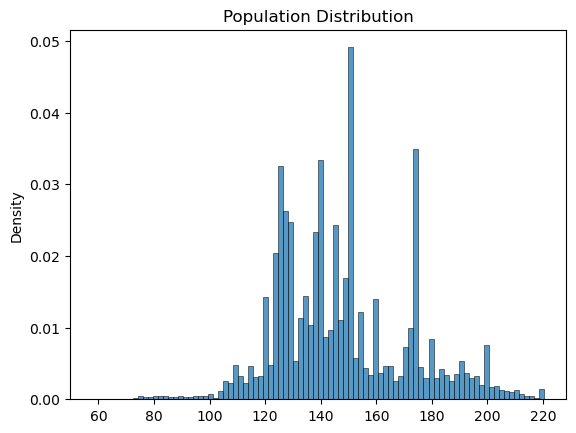

<Figure size 640x480 with 0 Axes>

In [4]:
# task 5: plot the population distribution with the mean labeled
population_distribution(song_tempos)

How would you describe this distribution?
it's skewed to the right meaning that most tracks have high bpm.

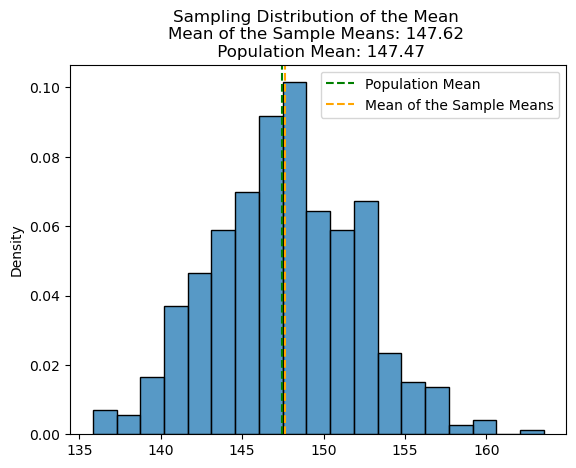

<Figure size 640x480 with 0 Axes>

In [6]:
# task 6: sampling distribution of the sample mean
samp_size = 30
sampling_distribution(song_tempos, samp_size, 'Mean')

Compare your sampling distribution of the sample means to the population mean.   
Is the sample mean an unbiased or biased estimator of the population?  
The sample mean is an unbiased estimator of the whole dataset because, provided the sample size is large enough, the sample mean always reflect the whole population mean.   
That's why the mean distribution assumes a normal shape.

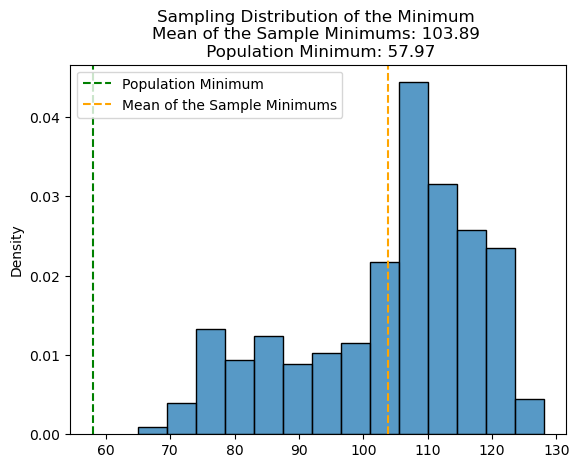

<Figure size 640x480 with 0 Axes>

In [7]:
# task 8: sampling distribution of the sample minimum
samp_size = 30
sampling_distribution(song_tempos, samp_size, 'Minimum')

Compare your sampling distribution of the sample minimums to the population minimum.   
Is the sample minimum an unbiased or biased estimator of the population?  
The sample minimum is a biased estimator of the dataset.   
The average of its distribution is always much higher than the actual minimum values.   
That's why the distribution is not normally shaped.

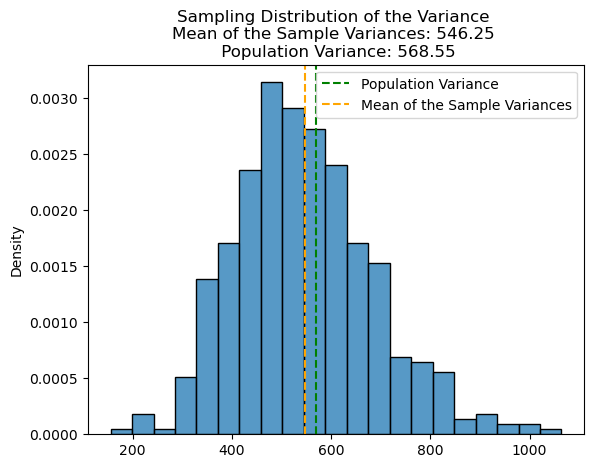

<Figure size 640x480 with 0 Axes>

In [8]:
# task 10: sampling distribution of the sample variance
samp_size = 30
sampling_distribution(song_tempos, samp_size, 'Variance')

Compare your sampling distribution of the sample variance to the population variance.   
Does the sample variance appear to be an unbiased or biased estimator of the population?  
The sample variance is a biased estimator of the whole dataset because, as it's less than the population variance.   
They are very similar though in this instance.  
We calculated the sample variance the same way we calculate population variance.  
to make it an unbiased estimator, change     
return np.var(x) # biased estimator  
to   
#return np.var(x, ddof=1) # unbiased estimator  

## Calculating probabilities

In [9]:
# task 13: calculate the population mean and standard deviation
population_mean = np.mean(song_tempos)
population_std = np.std(song_tempos)
print(population_mean) # 147.47
print(population_std) # 23.84

147.4740559035575
23.8443414956797


In [11]:
# task 14: calculate the standard error
standard_error = population_std / (samp_size**.5)
print(standard_error) # 4.3533

4.353361235346748


In [12]:
# task 15: calculate the probability of observing an average tempo of 140bpm or lower from a sample of 30 songs
x1 = 140
print(stats.norm.cdf(x1,population_mean,standard_error)) # 4.3 %

0.043003550159586706


In [16]:
# task 16: calculate the probability of observing an average tempo of 150bpm or higher from a sample of 30 songs
x2 = 150
print(1-stats.norm.cdf(x2,population_mean,standard_error)) # 28 %

0.28088028101821827


If you want to do some more exploration of sampling distributions, here are some more opportunities:
Add another sample statistic to the choose_statistic() function in helper_functions.py — such as median, mode, or maximum.
Explore a different column of data from the spotify_data.csv dataset.
Use the sampling distribution of the sample minimum to estimate the probability of observing a specific sample minimum. For example, from the plot, what is the chance of getting a sample minimum that is less than 130bpm?

In [17]:
# task 17: calculate the probability of observing an average tempo of 130bpm or lower from a sample of 30 songs
x3 = 130
print(stats.norm.cdf(x3,population_mean,standard_error)) # 0.00003 %

2.985894311912615e-05
